In [122]:
# Módulo/bibliotecas utilizadas
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [123]:
# Define caminhos de input e output
URL = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv'   # url de dados (input)
IMG_PATH  = '../img/'                  # diretório de imagens (output)

In [124]:
cols = ['year','month','date_excel','date','CO2[ppm]', 
        'seasonally_adjusted','fit','seasonally_adjusted_fit',
        'CO2_filled','seasonally_adjusted_filled','station']

df = pd.read_csv(URL,header=63, names=cols,usecols=['year', 'month','date_excel','date','CO2[ppm]'])

In [125]:
df

,year,month,date_excel,date,CO2[ppm]
0,1958,1,21200,1958.0411,-99.99
1,1958,2,21231,1958.1260,-99.99
2,1958,3,21259,1958.2027,315.71
3,1958,4,21290,1958.2877,317.45
4,1958,5,21320,1958.3699,317.51
...,...,...,...,...,...
799,2024,8,45519,2024.6230,-99.99
800,2024,9,45550,2024.7077,-99.99
801,2024,10,45580,2024.7896,-99.99
802,2024,11,45611,2024.8743,-99.99


<AxesSubplot:>

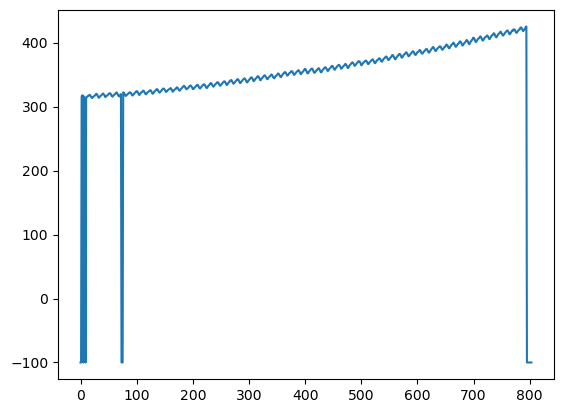

In [126]:
df['CO2[ppm]'].plot()

In [127]:
# Substitui flag -99.99 (ausência de dados por NaN)
df[df['CO2[ppm]']==-99.99] = np.nan

# Remove NaNs
df = df.dropna()

In [128]:
df = df.set_index('date')

Text(0.5, 1.0, 'CO$_2$ atmosférico em Manua Loa, Havaí')

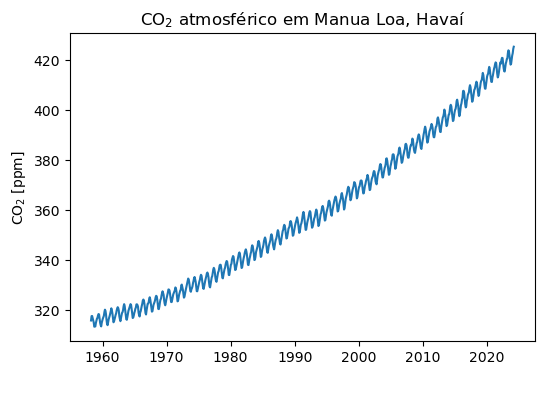

In [129]:
fig, ax = plt.subplots(figsize=(6,4))

df['CO2[ppm]'].plot(ax=ax)
ax.set_ylabel(r'CO$_2$ [ppm]')
ax.set_xlabel(' ')
ax.set_title('CO$_2$ atmosférico em Manua Loa, Havaí')

In [132]:
# seleciona um único ano
ano = 2004.
df_anual = df.where(df.year == ano).dropna()

# indexa a série anual pelo mês
df_anual = df_anual.set_index('month')

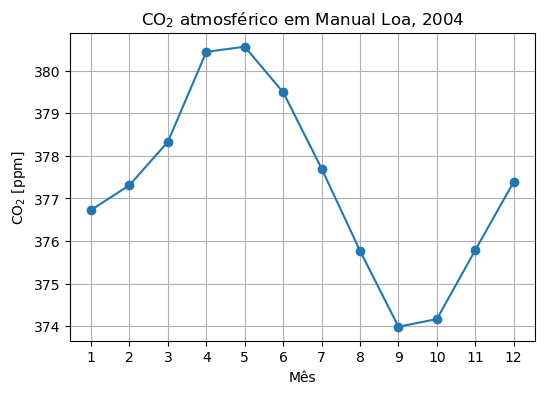

In [133]:
fig, ax = plt.subplots(figsize=(6,4))

df_anual['CO2[ppm]'].plot(ax=ax,marker='o')
ax.set_xticks(np.arange(1,13))
ax.set_ylabel(r'CO$_2$ [ppm]')
ax.set_xlabel('Mês')
ax.set_title('CO$_2$ atmosférico em Manual Loa, ' + str(int(ano)))
plt.grid()